# Simple Linear Regression

Problem Statement:

You have been provided with a dataset containing information about students' academic performance in their degree programs and their corresponding Job placement outcomes in terms of the packages received in lakhs per annum. Your task is to analyze the relationship between the percentages students recieve on their degree and the packages they receive as part of their job placements. Using simple linear regression, you aim to build a predictive model to estimate the packages received by students based on their academic performance percentages.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Score_Placement.csv")
df.head()

,percentage,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.tail()

,percentage,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [4]:
df.shape

(200, 2)

In [5]:
df.isnull().sum()

percentage    0
package       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   percentage  200 non-null    float64
 1   package     200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
df.describe()

,percentage,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


# Scatter Plot 

<Figure size 432x360 with 0 Axes>

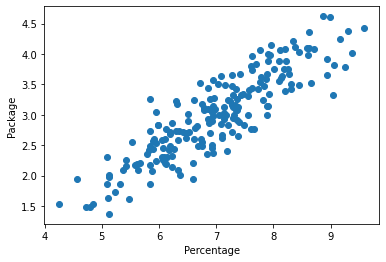

<Figure size 432x360 with 0 Axes>

In [8]:
plt.scatter(df['percentage'],df['package'])
plt.xlabel('Percentage')
plt.ylabel('Package')
plt.figure(figsize=(6,5))

# Correlation

In [9]:
df.corr()

,percentage,package
percentage,1.000000,0.880692
package,0.880692,1.000000


In [10]:
X=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [11]:
X

,percentage
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [12]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

# Train and Test

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train.head()

,percentage
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [15]:
X_test.head()

,percentage
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [16]:
y_train.head()

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
Name: package, dtype: float64

In [17]:
y_test.head()

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
Name: package, dtype: float64

In [18]:
X_train.shape

(160, 1)

In [19]:
X_test.shape

(40, 1)

In [20]:
y_train.shape

(160,)

In [21]:
y_test.shape

(40,)

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fit() 

In [23]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#m
lr.coef_

array([0.55795197])

In [25]:
#b
lr.intercept_

-0.8961119222429144

In [26]:
#y=mx+b(or)c,x=7.15
lr.predict([[7.15]])

array([3.09324469])

In [27]:
lr.predict([[8.15]])

array([3.65119666])

In [28]:
lr.predict([[9.6]])

array([4.46022702])

In [29]:
#y=mx+b
(7.15)*0.55795197+(-0.8961119222429144)

3.0932446632570856

In [30]:
df.head()

,percentage,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

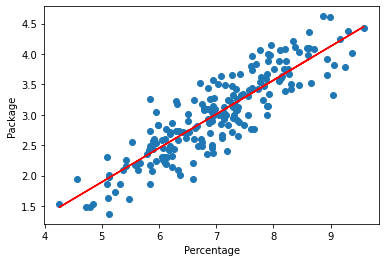

In [31]:
plt.scatter(df['percentage'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('Percentage')
plt.ylabel('Package')

# Model Evaluation

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [33]:
y_pred = lr.predict(X_test)

In [34]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

# MAE

In [35]:
mae=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error (MAE):",mae)

Mean Absolute Error (MAE): 0.2884710931878175


# MSE

In [36]:
mse=mean_squared_error(y_test,y_pred)
print("Mean Squared Error (MSE):",mse)

Mean Squared Error (MSE): 0.12129235313495527


# RMSE


In [37]:
rmse=mse**0.5
data_rmse={'Actual(y_test)':y_test,'Predicted(y_pred)':y_pred}
df_rmse=pd.DataFrame(data_rmse)
df_rmse.head()

,Actual(y_test),Predicted(y_pred)
112,4.10,3.891116
29,3.49,3.093245
182,2.08,2.384646
199,2.33,2.574349
193,1.94,1.653729


In [38]:
print("Root Mean Squared Error (RMSE):",rmse)

Root Mean Squared Error (RMSE): 0.34827051717731616


# R2S

In [39]:
r2s=r2_score(y_test,y_pred)
print("R Squared Score (R2S):",r2s)

R Squared Score (R2S): 0.780730147510384
